In [1]:
import sklearn 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
csvpath = r'similarity/similarity_matrix.csv'
simhalf = pd.read_csv(csvpath, sep=';', decimal=',', header=None, index_col=False)
simhalf


,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,3.0105,1.5208,1.0839,1.2910,1.1568,1.2226,-0.000168,1.0417,1.1552,0.02160,...,-0.026800,-0.02540,-0.02460,-0.02620,-0.02750,-0.02600,-0.02720,-0.02760,-0.02620,-0.02730
1,0.0000,3.0101,2.7340,2.9788,2.8312,2.9244,-0.000364,2.6777,2.7806,0.22997,...,-0.000123,-0.00647,-0.02040,-0.01400,-0.00901,-0.01600,-0.01100,-0.01010,-0.01450,-0.01130
2,0.0000,0.0000,3.0122,2.6283,2.9750,2.8853,-0.000368,2.8881,2.8695,0.33598,...,0.029600,0.01810,-0.00429,0.00730,0.01650,0.00398,0.01310,0.01530,0.00664,0.01270
3,0.0000,0.0000,0.0000,3.0006,2.7402,2.8788,-0.000359,2.6000,2.7203,0.22696,...,0.000239,-0.00597,-0.02010,-0.01380,-0.00865,-0.01570,-0.01080,-0.00988,-0.01430,-0.01110
4,0.0000,0.0000,0.0000,0.0000,3.0122,2.9619,-0.000358,2.8829,2.9121,0.28059,...,0.015800,0.00638,-0.01200,-0.00275,0.00478,-0.00567,0.00146,0.00343,-0.00353,0.00154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,3.01540,2.76910,2.65880,2.99510,2.74690
153,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,2.98420,2.94150,2.83650,2.98320
154,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00230,2.72450,2.94550
155,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00120,2.81710


In [3]:
n = len(simhalf)
sim = simhalf.to_numpy()
i_lower = np.tril_indices(n, -1)
sim[i_lower] = sim.T[i_lower] 


In [4]:
sim


array([[ 3.0105 ,  1.5208 ,  1.0839 , ..., -0.0276 , -0.0262 , -0.0273 ],
       [ 1.5208 ,  3.0101 ,  2.734  , ..., -0.0101 , -0.0145 , -0.0113 ],
       [ 1.0839 ,  2.734  ,  3.0122 , ...,  0.0153 ,  0.00664,  0.0127 ],
       ...,
       [-0.0276 , -0.0101 ,  0.0153 , ...,  3.0023 ,  2.7245 ,  2.9455 ],
       [-0.0262 , -0.0145 ,  0.00664, ...,  2.7245 ,  3.0012 ,  2.8171 ],
       [-0.0273 , -0.0113 ,  0.0127 , ...,  2.9455 ,  2.8171 ,  2.9842 ]])

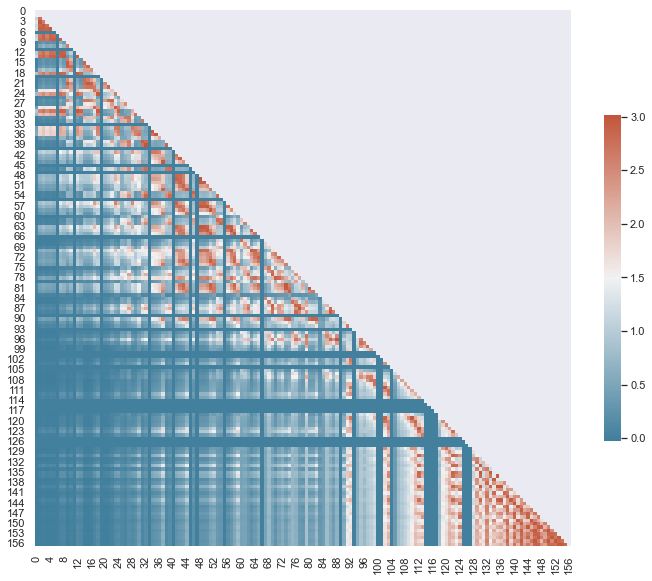

In [5]:
# visualize it
sns.set_theme(color_codes=True)
mask = np.triu(np.ones_like(sim, dtype=bool))

f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(sim, mask=mask, cmap=cmap, square=True, cbar_kws={"shrink": .5})
plt.savefig('similarity_matrix.jpg')


In [6]:
from sklearn.preprocessing import MinMaxScaler

beta = 1
simnorm1 = np.exp(-beta * sim / sim.std()) # exp
simnorm2 = MinMaxScaler().fit_transform(sim) # min max lin [.inverse_transform to get back]
n_clusters = 10


In [7]:
# K-Means # not really suited for this

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
km_lin = k_means.fit_predict(simnorm2)

In [9]:
km_exp = k_means.fit_predict(simnorm1)

In [10]:
# Spectral clustering

In [11]:
from sklearn.cluster import SpectralClustering # affinity precomputed ?
sc = SpectralClustering(n_clusters, affinity='nearest_neighbors', n_init=100,
                        assign_labels='discretize')
sc.fit_predict(sim)

# or, as normalized # gives same results
sc_nearn_lin = sc.fit_predict(simnorm2)

c:\Users\santinel\Miniconda3\envs\kremer\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
c:\Users\santinel\Miniconda3\envs\kremer\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [12]:
sc_nearn_exp = sc.fit_predict(simnorm1)

c:\Users\santinel\Miniconda3\envs\kremer\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [13]:
sc = SpectralClustering(n_clusters, affinity='precomputed', assign_labels='discretize')
sc_precomp_exp = sc.fit_predict(simnorm1)

In [14]:
sc_precomp_lin = sc.fit_predict(simnorm2)

c:\Users\santinel\Miniconda3\envs\kremer\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


- number of clusters may depend on data points / columns



In [15]:
# Agglomerative clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ac_exp = ward.fit_predict(simnorm1)

In [17]:
ac_lin = ward.fit_predict(simnorm2)

In [18]:
acp = AgglomerativeClustering(affinity='precomputed', n_clusters=10, linkage='complete')
ac_precomp_exp = acp.fit_predict(simnorm1)

In [19]:
ac_precomp_lin = acp.fit_predict(simnorm2)

In [20]:
# for visual comparison, it orders classes as it meets them in the array.
def increasingclasses(vx):
    pc = np.insert(vx, 0, 999)
    new_vx = []
    c = -1
    for p in range(len(vx)):
        if vx[p] != pc[p]: 
            if vx[p] in pc[0:p+1]:
                locc = np.where(np.isin(pc[0:p+1], vx[p]))[0][0]
                #print(vx[p])
                #print(pc[0:p+1])
                #print(locc)
                #print(new_vx)
                new_vx.append(new_vx[locc-1])
                continue
            else:
                c = c+1
        else:
            new_vx.append(new_vx[-1])
            continue
        new_vx.append(c)
    return np.array(new_vx)

# save csv files of cluster results
def createcsv(vx, vx_name, n_clusters):
    np.savetxt(vx_name+'_'+str(n_clusters)+'clusters'+".csv", vx, delimiter=",", fmt= '%.0d')
    return

In [21]:
names = ['kmeans_lin',
      'kmeans_exp',
      'spectclust_nn_lin',
      'spectclust_nn_exp',
      'spectclust_prec_lin',
      'spectclust_prec_exp',
      'agglclust_ward_lin',
      'agglclust_ward_exp',
      'agglclust_prec_lin',
      'agglclust_prec_exp']

models = [km_lin,
         km_exp,
         sc_nearn_lin,
         sc_nearn_exp,
         sc_precomp_lin,
         sc_precomp_exp,
         ac_lin,
         ac_exp,
         ac_precomp_lin,
         ac_precomp_exp]


In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.array([
    increasingclasses(km_lin),
    increasingclasses(km_exp),
    increasingclasses(sc_nearn_lin),
    increasingclasses(sc_nearn_exp),
    increasingclasses(sc_precomp_lin),
    increasingclasses(sc_precomp_exp),
    increasingclasses(ac_lin),
    increasingclasses(ac_exp),
    increasingclasses(ac_precomp_lin),
    increasingclasses(ac_precomp_exp)
                 ]), cmap = 'viridis')
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
ax.set_yticklabels(names)
plt.savefig('clustering_comparison.jpg')


In [ ]:
#save files
for n in range(len(names)):
    createcsv(models[n], names[n], n_clusters)
